In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd drive/'My Drive'

/content/drive/My Drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.read_csv('compare_single.csv')

In [0]:
print(len(df))
df.head()


5000


,E,rho,load,damage,h_1,n_part_damage,i_part_damage,damage_ratio,label_d,label_l,label_s,jobname
0,24.095279,2241.069289,-10620.201922,0.5,0.30,1.0,4.0,0.5,1.0,4.0,3.0,1.0
1,31.551329,2360.517996,-16860.860720,0.9,0.54,1.0,20.0,0.1,1.0,20.0,1.0,2.0
2,28.721682,2245.909699,-10047.384613,0.7,0.42,1.0,7.0,0.3,1.0,7.0,2.0,3.0
3,26.528342,2263.964817,-2440.194781,0.5,0.30,1.0,12.0,0.5,1.0,12.0,3.0,4.0
4,30.761574,2364.593145,-17952.251686,0.5,0.30,1.0,1.0,0.5,1.0,1.0,3.0,5.0


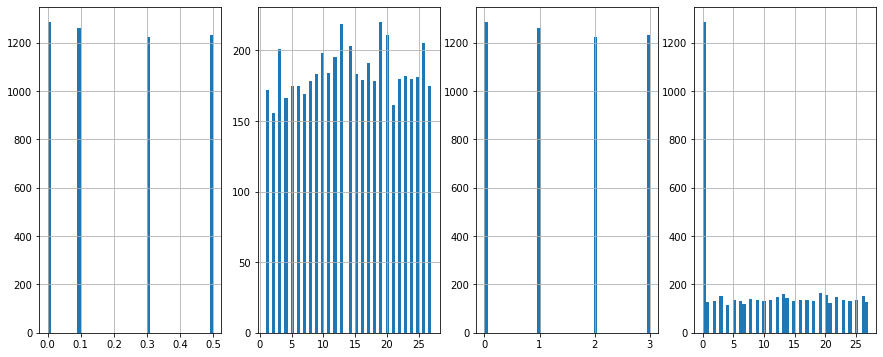

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(141)
df['damage_ratio'].hist(bins=50)
plt.subplot(142)
df['i_part_damage'].hist(bins=54)
plt.subplot(143)
df['label_s'].hist(bins=50)
plt.subplot(144)
df['label_l'].hist(bins=50)

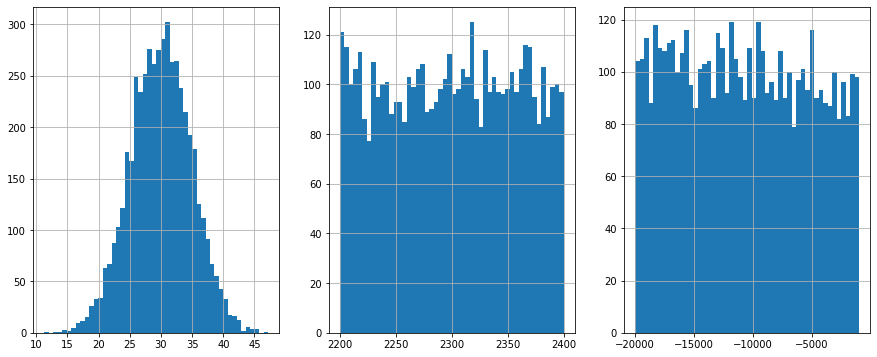

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(131)
df['E'].hist(bins=50)
plt.subplot(132)
df['rho'].hist(bins=50)
plt.subplot(133)
df['load'].hist(bins=50)

In [0]:
work = []
signal = []
list_file = ['time_serie_1.p']

for file in list_file:
  with open(file,'rb') as f:
        while True:
          try:
            u = pickle._Unpickler(f)
            u.encoding = 'latin1' 
            p = u.load()      
            A = p['acc']
            signal.append(A)
            work.append(p['jobname'])

          except EOFError:
            break      

In [0]:
df = pd.read_csv('compare_single.csv')
s = df['label_s'].to_list()
job = df['jobname'].to_list()

label = {}
for i in range(len(job)):
  label[int(job[i])] = s[i]

In [0]:
y = []
for i in range(len(work)):
  y.append(label[int(work[i])])

signal = np.array(signal)


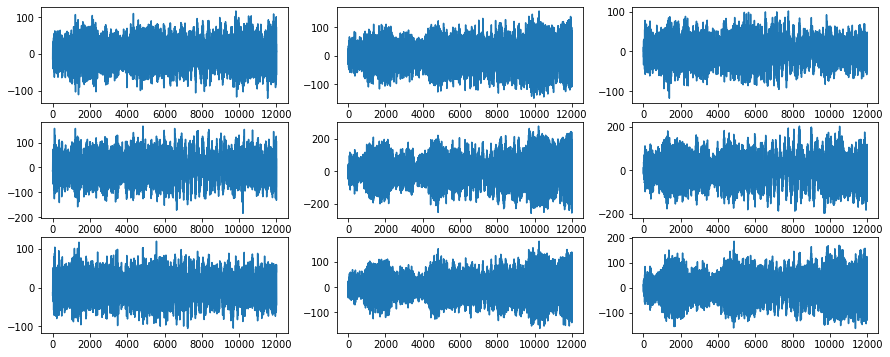

In [0]:
plt.figure(figsize=(15,6))
for i in range(1,4):
  for j in range(1,4):
    plt.subplot(330+(i-1)*3+j)
    plt.plot(signal[10,:,(i-1)*3+j-1])

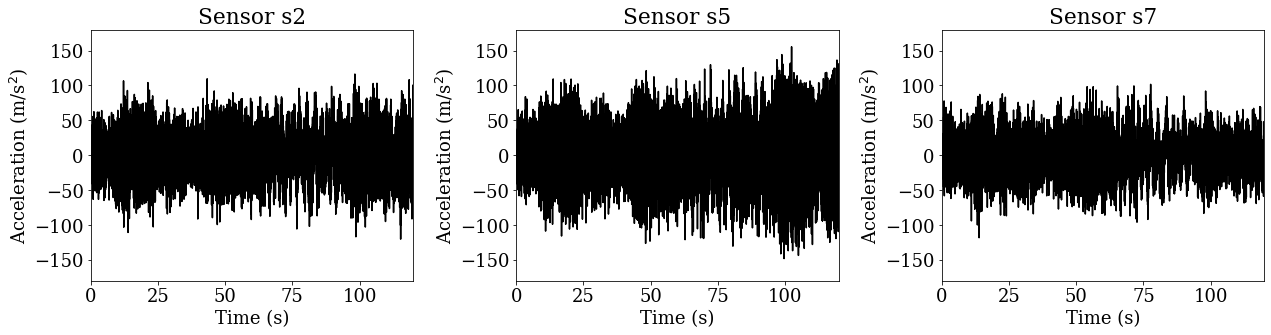

In [0]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Time New Roman']
rcParams.update({'font.size': 18})


t = np.linspace(0,120,np.shape(signal)[1])
tit = ['Sensor s2', 'Sensor s5', 'Sensor s7']
plt.figure(figsize=(18,5))
i=1
for j in range(1,4):
  ax = plt.subplot(130+(i-1)*3+j)
  ax.plot(t,signal[10,:,(i-1)*3+j-1],'black')
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Acceleration (m/s$^2$)')
  ax.set_title(tit[j-1])
  ax.set_xlim(0,120)
  ax.set_ylim(-180,180)
  ax.set_yticks(np.arange(-150, 180, 50)) 
plt.tight_layout()  

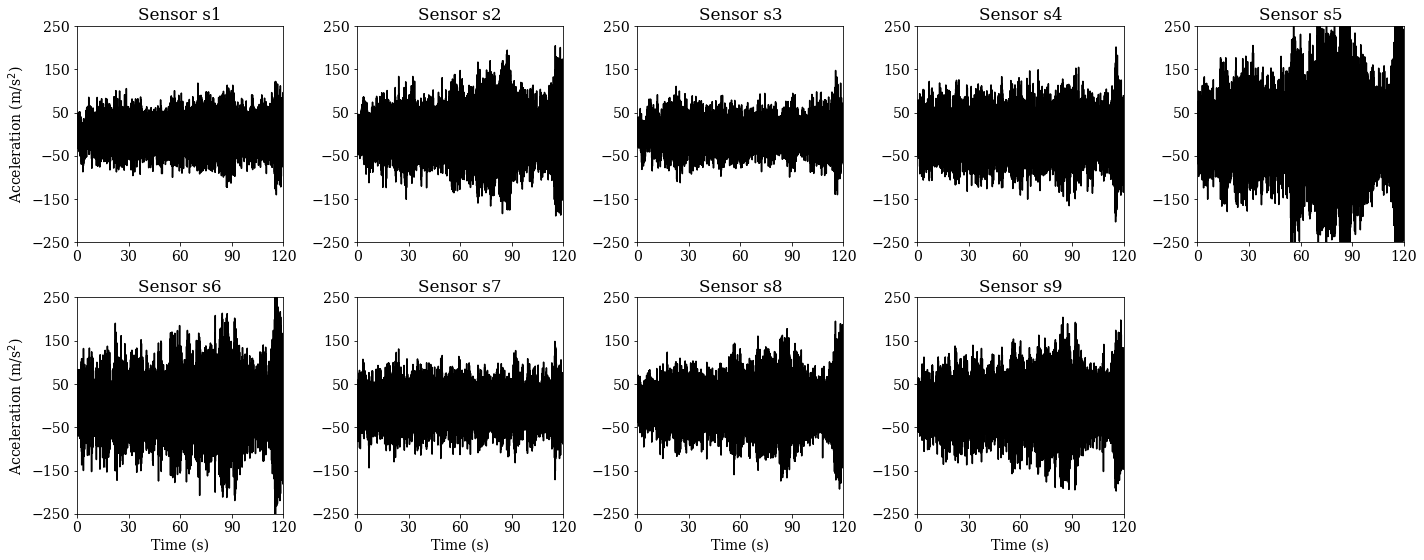

In [0]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Time New Roman']
rcParams.update({'font.size': 14})


t = np.linspace(0,120,np.shape(signal)[1])
tit = np.array(range(1,10))
plt.figure(figsize=(20,8))
for i in range(1,4):
  for j in range(1,4):
    ax = plt.subplot(250+(i-1)*3+j)
    ax.plot(t,signal[100,:,(i-1)*3+j-1],'black')
    
    s = (i-1)*3+j-1
    if s in [0,5]:
      ax.set_ylabel('Acceleration (m/s$^2$)')
    
    if s > 4:
      ax.set_xlabel('Time (s)')  
    
    ax.set_title('Sensor s'+str(tit[(i-1)*3+j-1]))

    ax.set_xlim(0,120)
    ax.set_ylim(-250,250)
    ax.set_yticks(np.arange(-250, 260, 100)) 
    ax.set_xticks(np.arange(0, 125, 30)) 
plt.tight_layout()  

In [0]:
work = []
signal = []
list_file = ['1D_present.p']

for file in list_file:
  with open(file,'rb') as f:
        while True:
          try:
            u = pickle._Unpickler(f)
            u.encoding = 'latin1' 
            p = u.load()      
            A = p['acc']
            signal.append(A)
            work.append(p['jobname'])

          except EOFError:
            break      

signal = np.array(signal)            

In [0]:
np.shape(signal)

(1, 12001, 9)

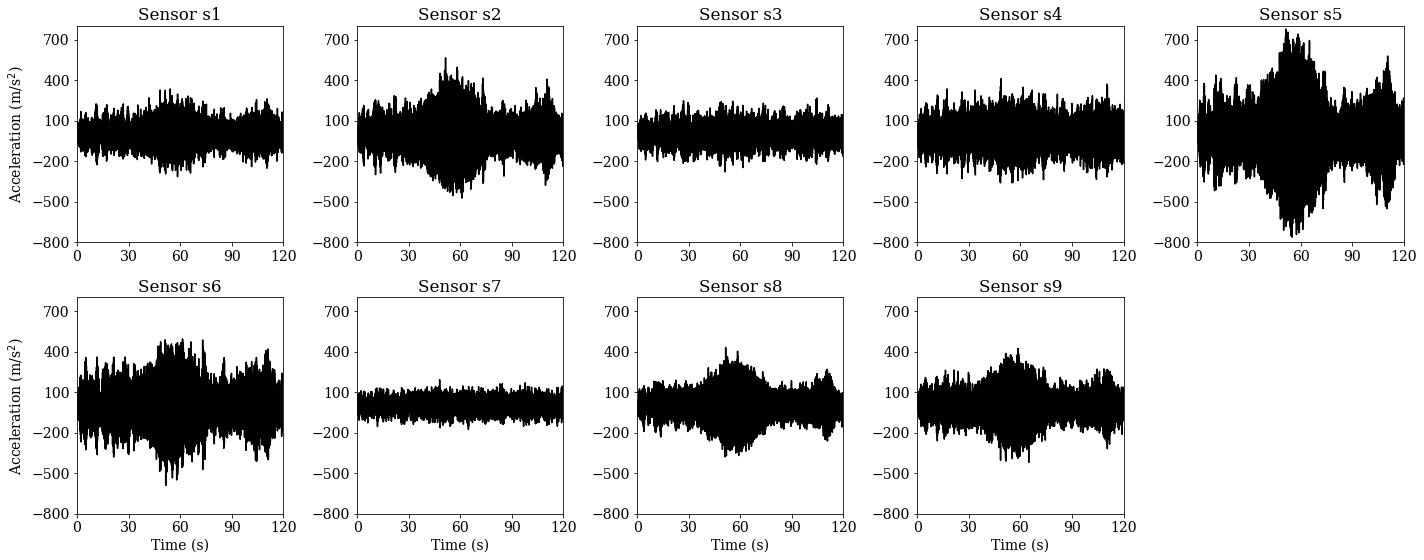

In [0]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Time New Roman']
rcParams.update({'font.size': 14})


t = np.linspace(0,120,np.shape(signal)[1])
tit = np.array(range(1,10))
plt.figure(figsize=(20,8))
for i in range(1,4):
  for j in range(1,4):
    ax = plt.subplot(250+(i-1)*3+j)
    ax.plot(t,signal[0,:,(i-1)*3+j-1],'black')
    
    s = (i-1)*3+j-1
    if s in [0,5]:
      ax.set_ylabel('Acceleration (m/s$^2$)')
    
    if s > 4:
      ax.set_xlabel('Time (s)')  
    
    ax.set_title('Sensor s'+str(tit[(i-1)*3+j-1]))

    ax.set_xlim(0,120)
    ax.set_ylim(-800,800)
    ax.set_yticks(np.arange(-800, 810, 300)) 
    ax.set_xticks(np.arange(0, 125, 30)) 
plt.tight_layout()  